In [59]:
import pandas as pd
import statsmodels.formula.api as smf

import numpy as np

import seaborn as sns

In [3]:
rec_ab_test_url = "https://raw.githubusercontent.com/matheusfacure/causal-inference-in-python-code/main/causal-inference-in-python/data/rec_ab_test.csv"

data = pd.read_csv(rec_ab_test_url)
data.head()

,recommender,age,tenure,watch_time
0,challenger,15,1,2.39
1,challenger,27,1,2.32
2,benchmark,17,0,2.74
3,benchmark,34,1,1.92
4,benchmark,14,1,2.47


In [6]:
results = smf.ols("watch_time ~ C(recommender)", data=data).fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0491,0.058,35.367,0.000,1.935,2.163
C(recommender)[T.challenger],0.1427,0.095,1.501,0.134,-0.044,0.330


In [8]:
risk_data_url = "https://raw.githubusercontent.com/matheusfacure/causal-inference-in-python-code/main/causal-inference-in-python/data/risk_data.csv"
risk_data = pd.read_csv(risk_data_url)

In [9]:
model = smf.ols("default ~ credit_limit", data=risk_data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2192,0.004,59.715,0.000,0.212,0.226
credit_limit,-2.402e-05,1.16e-06,-20.689,0.000,-2.63e-05,-2.17e-05


In [20]:
model = smf.ols("default ~ credit_limit + wage + credit_score1 + credit_score2", data=risk_data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.4037,0.009,46.939,0.000,0.387,0.421
credit_limit,3.063e-06,1.54e-06,1.987,0.047,4.16e-08,6.08e-06
wage,-8.822e-05,6.07e-06,-14.541,0.000,-0.000,-7.63e-05
credit_score1,-4.175e-05,1.83e-05,-2.278,0.023,-7.77e-05,-5.82e-06
credit_score2,-0.0003,1.52e-05,-20.055,0.000,-0.000,-0.000


In [23]:
model_complete = smf.ols("default ~ credit_limit + wage + credit_score1 + credit_score2", data=risk_data).fit()
model_complete.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.4037,0.009,46.939,0.000,0.387,0.421
credit_limit,3.063e-06,1.54e-06,1.987,0.047,4.16e-08,6.08e-06
wage,-8.822e-05,6.07e-06,-14.541,0.000,-0.000,-7.63e-05
credit_score1,-4.175e-05,1.83e-05,-2.278,0.023,-7.77e-05,-5.82e-06
credit_score2,-0.0003,1.52e-05,-20.055,0.000,-0.000,-0.000


In [24]:
model_t = smf.ols("credit_limit ~ wage + credit_score1 + credit_score2", data=risk_data).fit()
model_t.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-39.5745,24.953,-1.586,0.113,-88.483,9.334
wage,1.8386,0.016,118.127,0.000,1.808,1.869
credit_score1,1.8926,0.053,36.044,0.000,1.790,1.996
credit_score2,0.0918,0.044,2.087,0.037,0.006,0.178


In [27]:
risk_data_deb = risk_data.assign(credit_limit_res = (model_t.resid + risk_data["credit_limit"].mean()))

In [38]:
model_w_deb = smf.ols("default ~ credit_limit_res", data=risk_data_deb).fit()
model_w_deb.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.1421,0.005,30.001,0.000,0.133,0.151
credit_limit_res,3.063e-06,1.56e-06,1.957,0.050,-4.29e-09,6.13e-06


In [49]:
denoising_model = smf.ols('default ~ wage + credit_score1 + credit_score2', data=risk_data_deb).fit()
risk_data_denoise = risk_data_deb.assign(default_res = denoising_model.resid + risk_data_deb["default"].mean())

In [50]:
risk_data_denoise

,wage,educ,exper,married,credit_score1,credit_score2,credit_limit,default,credit_limit_res,default_res
0,950.0,11,16,1,500.0,518.0,3200.0,0,3347.583906,0.000981
1,780.0,11,7,1,414.0,429.0,1700.0,0,2331.086567,-0.043175
2,1230.0,14,9,1,586.0,571.0,4200.0,0,3665.134174,0.043289
3,1040.0,15,8,1,379.0,411.0,1500.0,0,1720.933260,-0.028427
4,1000.0,16,1,1,379.0,518.0,1800.0,0,2084.659827,0.000760
...,...,...,...,...,...,...,...,...,...,...
49995,840.0,12,13,1,466.0,482.0,2400.0,0,2817.487623,-0.020257
49996,700.0,15,16,1,328.0,393.0,1100.0,0,2044.247688,-0.063805
49997,930.0,14,16,1,552.0,339.0,1700.0,0,1802.366493,-0.053155
49998,1550.0,17,7,1,569.0,536.0,3300.0,0,2212.155035,0.058478


# Nonlinearities

In [51]:
spend_data_url = 'https://raw.githubusercontent.com/matheusfacure/causal-inference-in-python-code/main/causal-inference-in-python/data/spend_data.csv'
spend_data = pd.read_csv(spend_data_url)

In [53]:
spend_data.head()

,wage,educ,exper,married,credit_score1,credit_score2,credit_limit,spend
0,950.0,11,16,1,500.0,518.0,3200.0,3848
1,780.0,11,7,1,414.0,429.0,1700.0,3144
2,1230.0,14,9,1,586.0,571.0,4200.0,4486
3,1040.0,15,8,1,379.0,411.0,1500.0,3327
4,1000.0,16,1,1,379.0,518.0,1800.0,3508


<Axes: xlabel='credit_limit', ylabel='spend'>

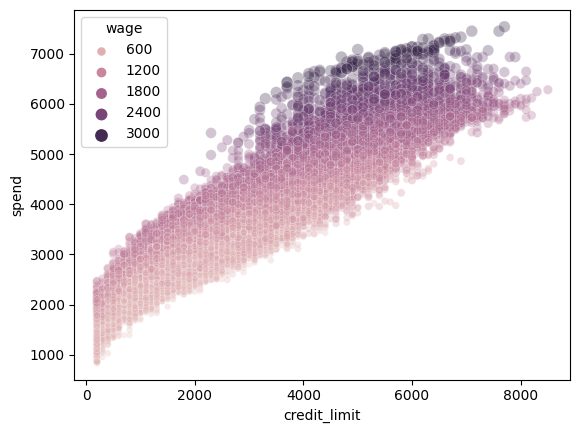

In [57]:
sns.scatterplot(
    data=spend_data,
    x="credit_limit",
    y="spend",
    hue="wage",
    size="wage",
    alpha=.3
)

<Axes: xlabel='credit_limit_sqrt', ylabel='spend'>

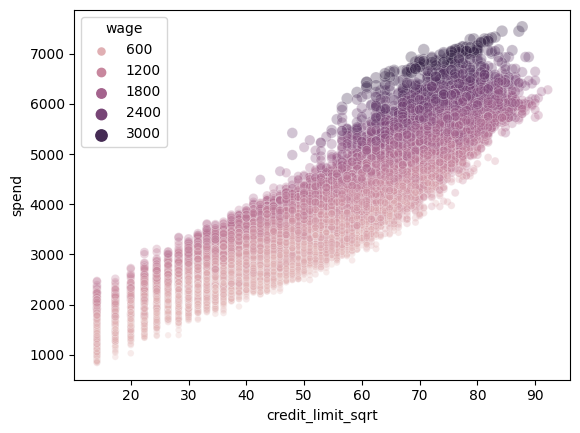

In [61]:
sns.scatterplot(
    data=spend_data.assign(credit_limit_sqrt = lambda x: np.sqrt(x["credit_limit"])),
    x="credit_limit_sqrt",
    y="spend",
    hue="wage",
    size="wage",
    alpha=.3
)

In [64]:
model_spend = smf.ols('spend ~ np.sqrt(credit_limit) + wage', data=spend_data).fit()
model_spend.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,383.5002,2.746,139.662,0.000,378.118,388.882
np.sqrt(credit_limit),43.8504,0.065,672.633,0.000,43.723,43.978
wage,1.0459,0.002,481.875,0.000,1.042,1.050


## Conditionally Random Experiments

In [66]:
risk_rnd_url = 'https://raw.githubusercontent.com/matheusfacure/causal-inference-in-python-code/main/causal-inference-in-python/data/risk_data_rnd.csv'
risk_data_rnd = pd.read_csv(risk_rnd_url)
risk_data_rnd.head()

,wage,educ,exper,married,credit_score1,credit_score2,credit_score1_buckets,credit_limit,default
0,890.0,11,16,1,490.0,500.0,400,5400.0,0
1,670.0,11,7,1,196.0,481.0,200,3800.0,0
2,1220.0,14,9,1,392.0,611.0,400,5800.0,0
3,1210.0,15,8,1,627.0,519.0,600,6500.0,0
4,900.0,16,1,1,275.0,519.0,200,2100.0,0


<Axes: xlabel='credit_limit', ylabel='Count'>

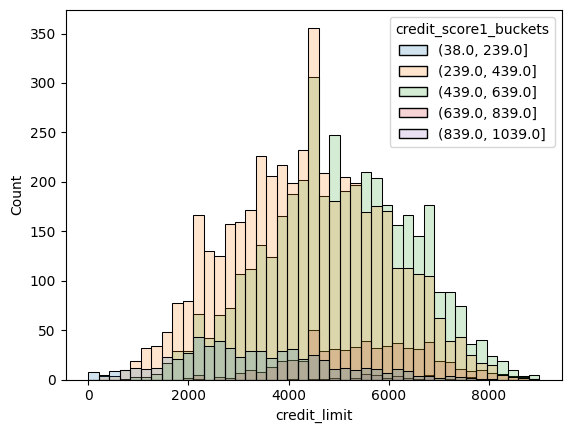

In [76]:
sns.histplot(data=risk_data_rnd.assign(
    credit_score1_buckets=lambda x: pd.cut(x["credit_score1"], 5)
), x='credit_limit',
hue='credit_score1_buckets',
alpha=.2)

## Dummy

In [77]:
risk_data_dummies = (risk_data_rnd.join(
    pd.get_dummies(risk_data_rnd['credit_score1_buckets'],
    prefix='sb',
    drop_first=True)
))

In [78]:
risk_data_dummies.head()

,wage,educ,exper,married,credit_score1,credit_score2,credit_score1_buckets,credit_limit,default,sb_200,sb_400,sb_600,sb_800,sb_1000
0,890.0,11,16,1,490.0,500.0,400,5400.0,0,0,1,0,0,0
1,670.0,11,7,1,196.0,481.0,200,3800.0,0,1,0,0,0,0
2,1220.0,14,9,1,392.0,611.0,400,5800.0,0,0,1,0,0,0
3,1210.0,15,8,1,627.0,519.0,600,6500.0,0,0,0,1,0,0
4,900.0,16,1,1,275.0,519.0,200,2100.0,0,1,0,0,0,0


In [79]:
model = smf.ols('default ~ credit_limit + sb_200 + sb_400 + sb_600 + sb_800 + sb_1000', data=risk_data_dummies).fit()

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2253,0.056,4.000,0.000,0.115,0.336
credit_limit,4.652e-06,2.02e-06,2.305,0.021,6.97e-07,8.61e-06
sb_200,-0.0559,0.057,-0.981,0.327,-0.168,0.056
sb_400,-0.1442,0.057,-2.538,0.011,-0.256,-0.033
sb_600,-0.2148,0.057,-3.756,0.000,-0.327,-0.103
sb_800,-0.2489,0.060,-4.181,0.000,-0.366,-0.132
sb_1000,-0.2541,0.094,-2.715,0.007,-0.438,-0.071


<Axes: xlabel='credit_limit', ylabel='pred'>

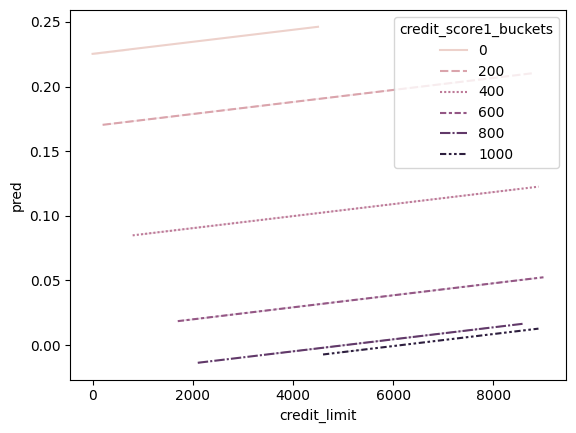

In [93]:
sns.lineplot(
    data=pd.concat([pd.Series(model.predict(risk_data_dummies), name='pred'),
                    risk_data_dummies],axis=1),
    x='credit_limit',
    y='pred',
    hue='credit_score1_buckets',
    style='credit_score1_buckets'
    #markers='credit_score1'

)

## Saturated model

In [98]:
model = smf.ols('default ~ credit_limit * C(credit_score1_buckets)', data=risk_data_rnd).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.3137,0.077,4.086,0.000,0.163,0.464
C(credit_score1_buckets)[T.200],-0.1521,0.079,-1.926,0.054,-0.307,0.003
C(credit_score1_buckets)[T.400],-0.2339,0.078,-3.005,0.003,-0.386,-0.081
C(credit_score1_buckets)[T.600],-0.2957,0.080,-3.690,0.000,-0.453,-0.139
C(credit_score1_buckets)[T.800],-0.3227,0.111,-2.919,0.004,-0.539,-0.106
C(credit_score1_buckets)[T.1000],-0.3137,0.428,-0.733,0.464,-1.153,0.525
credit_limit,-7.072e-05,4.45e-05,-1.588,0.112,-0.000,1.66e-05
credit_limit:C(credit_score1_buckets)[T.200],7.769e-05,4.48e-05,1.734,0.083,-1.01e-05,0.000
credit_limit:C(credit_score1_buckets)[T.400],7.565e-05,4.46e-05,1.696,0.090,-1.18e-05,0.000
credit_limit:C(credit_score1_buckets)[T.600],7.398e-05,4.47e-05,1.655,0.098,-1.37e-05,0.000


In [103]:
model.params[model.params.index.str.contains("credit_limit:")] + model.params["credit_limit"]

credit_limit:C(credit_score1_buckets)[T.200]     6.973298e-06
credit_limit:C(credit_score1_buckets)[T.400]     4.933959e-06
credit_limit:C(credit_score1_buckets)[T.600]     3.263594e-06
credit_limit:C(credit_score1_buckets)[T.800]     2.143591e-06
credit_limit:C(credit_score1_buckets)[T.1000]   -6.562134e-17
dtype: float64

In [106]:
model

## Regression as Variance Weighted Average

In [122]:
np.random.seed(123)

t1 = np.random.normal(0, 1, size=1_000)
df1 = pd.DataFrame(dict(
    t=t1,
    y=1*t1, #ATE of 1
    g=1
))

t2 = np.random.normal(0, 1, size=500)
df2 = pd.DataFrame(dict(
    t=t2,
    y=2*t2,
    g=2,
))

df = pd.concat([df1, df2])
df.head()

,t,y,g
0,-1.085631,-1.085631,1
1,0.997345,0.997345,1
2,0.282978,0.282978,1
3,-1.506295,-1.506295,1
4,-0.578600,-0.578600,1


In [123]:
def regress(df, t, y):
    return smf.ols(f"{y} ~ {t}", data=df).fit().params[t]

In [124]:
effect_by_group = df.groupby("g").apply(regress, y="y", t="t")
effect_by_group

g
1    1.0
2    2.0
dtype: float64

In [125]:
(effect_by_group * df.groupby("g").size()).sum() / df.groupby("g").size().sum()

1.3333333333333324

In [126]:
model = smf.ols("y ~ t + C(g)", data=df).fit()
model.params

Intercept    0.011664
C(g)[T.2]    0.030376
t            1.294805
dtype: float64

In [129]:
risk_data_rnd.groupby("credit_score1_buckets")["credit_limit"].transform("mean")

0       4575.456498
1       3368.510638
2       4575.456498
3       5364.400448
4       3368.510638
           ...     
9995    4575.456498
9996    4575.456498
9997    4575.456498
9998    5364.400448
9999    4575.456498
Name: credit_limit, Length: 10000, dtype: float64

# Ommited variable bias

In [130]:
long_model = smf.ols("default ~ credit_limit + wage", data=risk_data).fit()
ommited_model = smf.ols("wage ~ credit_limit", data=risk_data).fit()

(long_model.params["credit_limit"] + long_model.params["wage"] * ommited_model.params["credit_limit"])

-2.401961992597026e-05